# Task 6.5 Unsupervised Machine Learning

## 1. Importing Libraries and Data

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Import data
df_sal = pd.read_csv(r'/Users/melanie/Desktop/Data Science and STEM Salaries/Data/Levels_Fyi_Salary_Data_cleaned4.csv')

In [4]:
df_sal.head()

,company,title,total_yearly_compensation,city,state,years_of_experience,years_at_company,base_salary,bonus,gender,city_id,Masters_Degree,Bachelors_Degree,Doctorate_Degree,High_School,Some_College
0,Oracle,Product Manager,127000,Redwood City,California,1.5,1.5,107000,10000.0,Unknown,7392,0,0,0,0,0
1,eBay,Software Engineer,100000,San Francisco,California,5.0,3.0,0,0.0,Unknown,7419,0,0,0,0,0
2,Amazon,Product Manager,310000,Seattle,Washington,8.0,0.0,155000,0.0,Unknown,11527,0,0,0,0,0
3,Apple,Software Engineering Manager,372000,Sunnyvale,California,7.0,5.0,157000,35000.0,Unknown,7472,0,0,0,0,0
4,Microsoft,Software Engineer,157000,Mountain View,California,5.0,3.0,0,0.0,Unknown,7322,0,0,0,0,0


In [5]:
# Creating a subset of only numerical columns
df_sal_num = df_sal[['total_yearly_compensation', 'years_of_experience', 'years_at_company', 'base_salary',
                   'bonus']]

In [6]:
df_sal_num

,total_yearly_compensation,years_of_experience,years_at_company,base_salary,bonus
0,127000,1.5,1.5,107000,10000.0
1,100000,5.0,3.0,0,0.0
2,310000,8.0,0.0,155000,0.0
3,372000,7.0,5.0,157000,35000.0
4,157000,5.0,3.0,0,0.0
...,...,...,...,...,...
52511,327000,10.0,1.0,155000,22000.0
52512,237000,2.0,2.0,146900,16000.0
52513,220000,14.0,12.0,157000,20000.0
52514,280000,8.0,4.0,194688,29000.0


## 2. The Elbow Technique

In [7]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [8]:
score = [kmeans[i].fit(df_sal_num).score(df_sal_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1115214885556916.5,
 -535608334722386.44,
 -352203041349883.6,
 -269001138174249.72,
 -222920473898580.0,
 -194422598547880.28,
 -171086627434391.7,
 -151388362006410.03,
 -133409793161391.73]

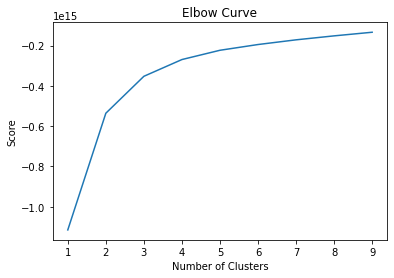

In [9]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There is a jump from 2 to 3 and a slight curve upwards from 3 to 4. For this reason, we will use 4 for our number of clusters. 

## 4. K-means Clustering

In [10]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [11]:
# Fit the kmeans object to the dataset
kmeans.fit(df_sal_num)

KMeans(n_clusters=4)

In [16]:
clusters = kmeans.cluster_centers_

In [17]:
# Print the clusters
print(clusters)

[[1.44768833e+05 4.57664184e+00 2.19761900e+00 1.12063275e+05
  1.06065897e+04]
 [2.47097761e+05 8.39685701e+00 3.03869787e+00 1.62932821e+05
  2.35216608e+04]
 [4.12828446e+05 1.16922071e+01 3.59856120e+00 2.04276314e+05
  4.00825003e+04]
 [7.44844410e+05 1.48232995e+01 4.23369820e+00 2.64595848e+05
  6.95167850e+04]]


In [24]:
y_km = kmeans.fit_predict(df_sal_num)

In [25]:
df_sal_num['clusters'].value_counts()

3    24168
1    19806
0     7264
2     1278
Name: clusters, dtype: int64

In [26]:
df_sal_num.head()

,total_yearly_compensation,years_of_experience,years_at_company,base_salary,bonus,clusters
0,127000,1.5,1.5,107000,10000.0,3
1,100000,5.0,3.0,0,0.0,3
2,310000,8.0,0.0,155000,0.0,1
3,372000,7.0,5.0,157000,35000.0,0
4,157000,5.0,3.0,0,0.0,3


## 5. Plotting the Clusters

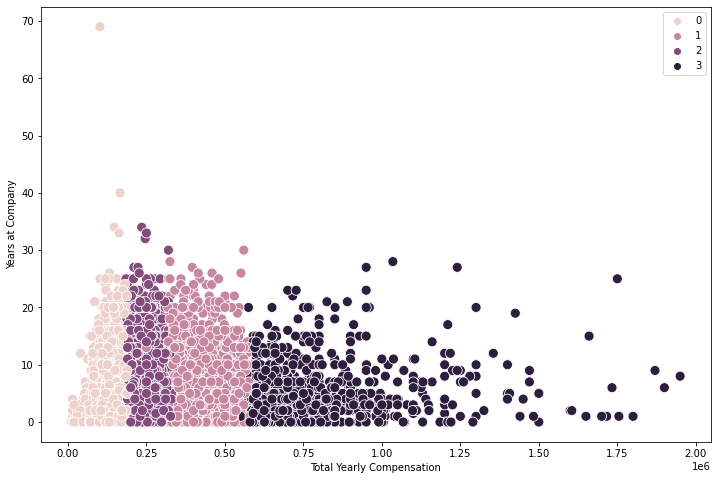

In [20]:
# Plotting total_yearly_compensation and years_at_company variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sal_num['total_yearly_compensation'], y=df_sal_num['years_at_company'],
                     hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Total Yearly Compensation') 
plt.ylabel('Years at Company') 
plt.show()

#### The first cluster (coded as 0), in light pink, includes points with lower yearly compensation and with most years at company less than 30, minus a few extreme values. The second cluster (coded as 2), in purple, contains a higher yearly compensation with most years at company at less than 30. The third cluster (coded as 1), in dark pink, contains points with even higher yearly compensations and years at company are less than 30. The fourth cluster (coded as 3), in dark purple, contains the highest compensated with years at company being less than 30 years. 

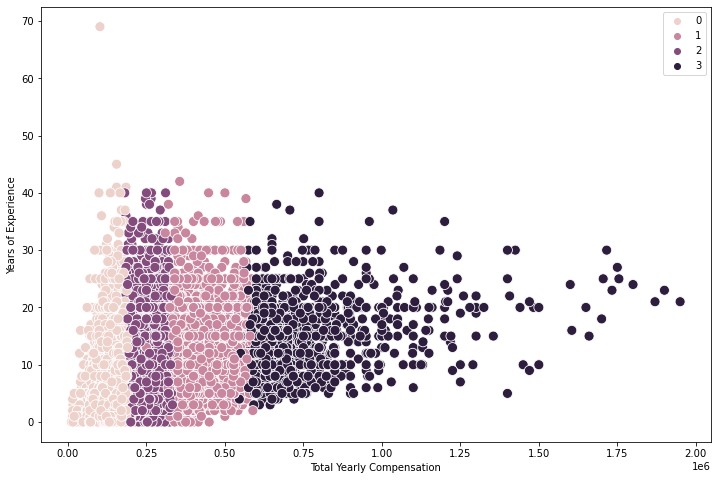

In [21]:
# Plotting total_yearly_compensation and years_of_experience variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sal_num['total_yearly_compensation'], y=df_sal_num['years_of_experience'],
                     hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Total Yearly Compensation') 
plt.ylabel('Years of Experience') 
plt.show()

#### The first cluster (coded as 0), in light pink, includes points with lower yearly compensation and withyears of experience of about 45 years and lower, minus an extreme value. The second cluster (coded as 2), in purple, contains a higher yearly compensation with most years of experience at 40 years or less. The third cluster (coded as 1), in dark pink, contains points with even higher yearly compensation and years of experience of 40 years or less, minus a few. The fourth cluster (coded as 3), in dark purple, contains the highest compensated with years of experience being less than 40 years.  

## Descriptive Statistics

In [29]:
df_sal_num.loc[df_sal_num['clusters'] == 0, 'cluster'] = 'light pink'
df_sal_num.loc[df_sal_num['clusters'] == 1, 'cluster'] = 'pink'
df_sal_num.loc[df_sal_num['clusters'] == 2, 'cluster'] = 'purple'
df_sal_num.loc[df_sal_num['clusters'] == 3, 'cluster'] = 'dark purple'

In [30]:
df_sal_num.groupby('cluster').agg({'total_yearly_compensation':['mean', 'median'], 
                         'years_at_company':['mean', 'median'], 
                         'years_of_experience':['mean', 'median'],
                          'base_salary':['mean', 'median']})

total_yearly_compensation           years_at_company         \
                                 mean    median             mean median   
cluster                                                                   
dark purple             144768.833002  150000.0         2.197619    1.0   
light pink              412851.459251  400000.0         3.598341    2.5   
pink                    247097.760780  240000.0         3.038698    2.0   
purple                  744973.395931  690000.0         4.235446    3.0   

            years_of_experience           base_salary            
                           mean median           mean    median  
cluster                                                          
dark purple            4.576642    3.0  112063.275405  120000.0  
light pink            11.691423   10.0  204279.993117  200000.0  
pink                   8.396857    7.0  162932.820610  161000.0  
purple                14.830203   15.0  264622.136150  250000.0

#### By looking at these statistics, it's actually the purple cluster that has the best stats. It has the highest median yearly compensation and base salary, along with the highest median years of experience. If we did further analysis by narrowing down compensation by either location or company, we may be able to see if compensation is affected more by either of these variables. 